In [3]:
import numpy as np
import pandas as pd
import random

In [16]:
def black_scholes(stock, strike, experation, rf, mu, sigma, option = 'put'):
    if option == 'put':
        d1 = (np.log(stock/strike) + (rf + sigma**2 /2) * experation ) / (sigma * np.sqrt(experation))
        d2 = d1 - sigma * np.sqrt(experation)
        value = norm.cdf(-d2) * strike * np.exp(-rf * experation) -  norm.cdf(-d1) * stock
    return value    

In [5]:
stock = 100
strike = 100
experation = 63/252
rf = 0.04
mu = 0.08
sigma = 0.2

In [6]:
d1 = (np.log(stock/strike) + (rf + sigma**2 /2) * experation ) / (sigma * np.sqrt(experation))

In [7]:
d1

0.15

In [8]:
d2 = d1 - sigma * np.sqrt(experation)

In [9]:
d2

0.04999999999999999

In [11]:
from scipy.stats import norm

In [12]:
value = norm.cdf(-d2) * strike * np.exp(-rf * experation) -  norm.cdf(-d1) * stock

In [13]:
value

3.4902197839388975

In [17]:
black_scholes (stock, strike, experation, rf, mu, sigma)

3.4902197839388975

In [22]:
experation = (63 - 5) / 252
stock = 102

In [23]:
black_scholes (stock, strike, experation , rf, mu, sigma)

2.5632473079388163

In [24]:
experation = (126-5) / 252

In [25]:
black_scholes (stock, strike, experation , rf, mu, sigma)

3.793080003681659

In [371]:
def brownian_motion(prev_price, d_time, mu, sigma, simulations = 1):
    new_price = prev_price * np.exp((mu - sigma ** 2 / 2) * d_time + sigma * np.sqrt(d_time) * np.random.normal(0,1, simulations) )
    return new_price

In [372]:
(prev_price, d_time, mu, sigma) = (100, 5/252, mu, sigma)

In [358]:
new_price = prev_price * np.exp((mu - sigma ** 2 / 2) * d_time + sigma * np.sqrt(d_time) * np.random.normal(0,1) )
new_price

99.64179080319114

In [359]:
mu = 0.08
sigma = 0.2
start_price = 100
start_day = 0
end_day = 5
days_in_year = 252

dt = (end_day - start_day) / days_in_year

In [360]:
days_5_price = brownian_motion(prev_price = start_price, d_time = dt, mu = mu, sigma = sigma)

In [361]:
days_5_price

array([102.22989283])

In [441]:
put1_days_to_experation = 63
put2_days_to_experation = 126
stike = 100
rf = 0.04



In [442]:
total_portfolio_value(stock = 100, strike = strike, experation1 = put1_days_to_experation / 252, experation2 = put2_days_to_experation /252, rf = rf, mu = mu, sigma = sigma,prev_value = 'None')

108.01508566864584

In [443]:
total_portfolio_value = start_day + black_scholes(stock = start_price, strike = strike, experation = put1_days_to_experation = 63, rf = rf, mu = mu, sigma = sigma, option = 'put') + black_scholes(stock = start_price, strike = strike, experation = put2_days_to_experation = 63, rf = rf, mu = mu, sigma = sigma, option = 'put')

SyntaxError: invalid syntax (<ipython-input-443-a717dbd04d0b>, line 1)

In [444]:
put1 = black_scholes(stock = start_price, strike = strike, experation = put1_days_to_experation / days_in_year, rf = rf, mu = mu, sigma = sigma)

In [445]:
put2 = black_scholes(stock = start_price, strike = strike, experation = put2_days_to_experation / days_in_year, rf = rf, mu = mu, sigma = sigma)

In [446]:
put1

3.4902197839388975

In [447]:
put2

4.646945344290259

In [448]:
total_portfolio_value = put1 + put2 + start_price

In [449]:
total_portfolio_value

108.13716512822916

In [375]:
def monte_carlo(input_function,**kwargs):
    df = pd.DataFrame(input_function(**kwargs))
    return df


In [450]:
def total_portfolio_value(stock, strike, experation1, experation2, rf, mu, sigma,prev_value):
        
    today_value = stock + black_scholes(stock, strike, experation1, rf, mu, sigma) + black_scholes(stock, strike, experation2, rf, mu, sigma)
    if prev_value == 'None':
        return today_value
    return [today_value, ((today_value/prev_value) - 1)]

In [458]:
stock = mc
strike = 100
experation1 = (63-5)/252
experation2 = (126-5)/252
rf = 0.04
mu = 0.08
sigma = 0.2
prev_value = total_portfolio_value(stock = 100, strike = 100, experation1 = 63/252, experation2 = 126/252, prev_value = 'None', rf = rf, mu = mu, sigma = sigma)

In [459]:
prev_value

108.13716512822916

In [460]:
df3 = total_portfolio_value(stock, strike, experation1, experation2, rf, mu, sigma, prev_value)

In [461]:
df3

[               0
 0     108.065275
 1     108.099736
 2     107.827840
 3     107.845188
 4     107.844563
 ...          ...
 9995  108.953362
 9996  107.983975
 9997  108.431335
 9998  108.643723
 9999  108.835887
 
 [10000 rows x 1 columns],              0
 0    -0.000665
 1    -0.000346
 2    -0.002860
 3    -0.002700
 4    -0.002706
 ...        ...
 9995  0.007548
 9996 -0.001417
 9997  0.002720
 9998  0.004684
 9999  0.006461
 
 [10000 rows x 1 columns]]

In [462]:
df3[1].mean()

0    0.000937
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025459AFA7C8>]],
      dtype=object)

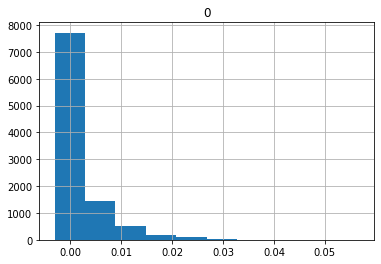

In [463]:
df3[1].hist()

In [464]:
df3[1].quantile(0.05)

0   -0.003074
Name: 0.05, dtype: float64

In [457]:
mc = monte_carlo(input_function = brownian_motion, simulations = 10000, prev_price = 100, d_time = 5/252, mu = mu, sigma = sigma)
mc

,0
0,100.750113
1,100.925076
2,98.864789
3,99.116897
4,96.944635
...,...
9995,103.803547
9996,100.286102
9997,102.265380
9998,102.944471


mc.mean()

In [391]:
mc.mean()

0    100.166804
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254588FD708>]],
      dtype=object)

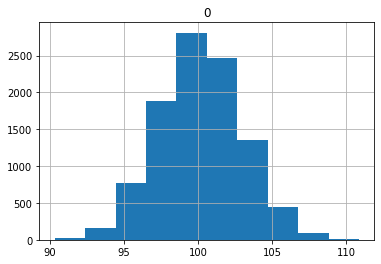

In [392]:
mc.hist()

In [393]:
from scipy import stats

In [394]:
stats.kurtosis(mc, fisher=False) #unlike the pandas kurtosis you can make it to where normal = 3

array([3.01355918])

Test to see if normally distributed: (null hypothesis is that it is normal) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest

In [395]:
stats.normaltest(mc)

NormaltestResult(statistic=array([8.03685492]), pvalue=array([0.01798122]))